In [5]:
import pymysql
import joblib
from Model.category import MultiColumnLabelEncoder
import pandas as pd

conn=pymysql.connect(host='*.com',port=3306,user='',password='',db='', cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
sql = "select * from category_test_insert2"
cursor.execute(sql)
result = cursor.fetchall()
conn.close()
original = pd.DataFrame(result)
multi = MultiColumnLabelEncoder(columns=['machinery'  , 'assembly' , 'items', 'part1'])
original1 = multi.fit_transform(original)

model_rf = joblib.load('./Model_Category.pkl')
db = original1.loc[:, ['machinery', 'assembly', 'items', 'part1']]
prediction = model_rf.predict(db)
pred_df = pd.DataFrame(prediction)

concat = pd.concat([db, pred_df], axis=1)
concat.columns = ['machinery', 'assembly', 'items', 'part1', 'key2']
prediction_inv = multi.inverse_transform(concat)
prediction_inv.columns =['machinery', 'assembly', 'items', 'part1', 'predicted']
prediction_inv2 = pd.concat([prediction_inv, original['key2']], axis=1)
prediction_inv2['TF'] = prediction_inv2['predicted'] == prediction_inv2['key2']
prediction_inv2

,machinery,assembly,items,part1,predicted,key2,TF
0,GENERATOR ENGINE,LINES GP-FUEL,SEAL-O-RING-STOR,7.00E-275,COOLER,COOLER,True
1,GENERATOR ENGINE,GASKET KIT,OIL COOLER & LINES,7.00E-275,COOLER,COOLER,True
2,GENERATOR ENGINE,MANIFOLD GP-EXH,WASHER,7.00E-275,COOLER,COOLER,True
3,GENERATOR ENGINE,TURBO GP,BOLT-HIGH TEMP,7.00E-275,COOLER,COOLER,True
4,GENERATOR ENGINE,INSTRUMNT PANEL GP,SEAL,7.00E-275,GASKET,COOLER,False
...,...,...,...,...,...,...,...
21079,HYD. SYSTEM,BOAT DAVIT & N.D CRANE LINE,HYD. CYLINDER_NET BOAT DAVIT,φ150 × φ85 × 695st,CYLINDER,CYLINDER,True
21080,HYD. SYSTEM,BOAT DAVIT & N.D CRANE LINE,HYD. CYLINDER_N.D CRANE_BOOM_LIFTER,φ160 × φ112 × 1130st,CYLINDER,CYLINDER,True
21081,NET BOAT,ELECTRIC CLUTCH,PULLY,Φ305X5V-3,GAUGE,BELT,False
21082,NET BOAT,HAND HYDRAULIC STEERING SYSTEM,CYLINDER,Φ50 x S195 CYLINDER,CYLINDER,CYLINDER,True


In [6]:
round(len(prediction_inv2.loc[prediction_inv2['TF'] == True]) / len(prediction_inv2), 2)

0.96

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pymysql
import joblib
from Model.category import MultiColumnLabelEncoder
import pandas as pd

conn=pymysql.connect(host='.com',port=3306,user='',password='',db='', cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
sql = "select * from category_test_insert3"
cursor.execute(sql)
result = cursor.fetchall()
conn.close()
model_rf = joblib.load('./Model_Category.pkl')
original = pd.DataFrame(result)
original

,id,cheongguseobeonho,no,subject_,machinery,assembly,items,part1,Part2,key1,...,control_no,ipgochanggo,changgochulgo,changgochulgosuryang,chulgoseonbak,chulgounbanseon,seonbagipgo,seonbagipgosuryang,wallyo_yeobu,assembly_temp
0,7459,TER-BS-ESP-2101002,43,"TER-F-ENGINE-20201228-1 (M/E, A/E, P/WINCH, HY...",PURSE WINCH,"BRAKE, CLUTCH ASSY",GASKET,13.004.15395.000,,13.004.15395.000,...,KTH MARCO 발주,BS,2021-03-13,10,TER,R/C OCEANUS,0000-00-00,0,,"BRAKE, CLUTCH ASSY"
1,5456,JBG-BS-ESP-1911012,24,출어용 REF COMP O/H PARTS,REF COMPRESSOR,CYLINDER LINER & CON-ROD,CYLINDER LINER O-RING R,1206540,REF NO.7Z248,1206540REF NO.7Z248,...,우림공사 발주,BS,2019-11-12,16,JBG,본선 선적,2019-11-12,16,완료,CYLINDER LINER & CON-ROD
2,14657,COK-BS-ESP-1907014,13,COK-F-ENG-190708-01,F.O PURIFIER,Machine bottom part,Nut,563005 01,,563005 01,...,19-08-157,BW,2019-09-02,1,COK,S/FON,2019-09-15,1,완료,Machine bottom part
3,14344,JBG-BS-ESP-2104003,34,정기 국외 발주 (기관),GENERATOR ENGINE,PUMP GP-WATER,PUMP GP-WATER,4W-3027,,4W-3027,...,혜인 발주,BS,2021-07-24,2,JBG,본선 선적,0000-00-00,0,,PUMP GP-WATER
4,2450,HAN-BS-ESP-2012002,1,상가수리용 AUX ENG EXPANSION TANK CAP,GENERATOR ENGINE,TANK GP-EXP -B,CAP-PRESS VALVE,40046561,,40046561,...,,BS,2021-12-02,2,BLO,CONTAINER 탁송,0000-00-00,0,,TANK GP-EXP -B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,17425,HAN-BS-ESP-1911001,14,기관 대일 발주,REF COMPRESSOR,CRANK CASE,"GASKET NA, SIDE COVER",82090510,REF NO. 7Z129,82090510REF NO. 7Z129,...,,BS,2019-12-24,6,HAN,HANARO,0000-00-00,0,,CRANK CASE
21080,19723,TER-BS-ESP-1903012,10,TER-F-ENG-190315-01,MAIN ENGINE,TURBOCHARGER (LEFT BANK) PART 326X1368,"NUT, HEX FLANGE, M10 X 1.5",L206AP19,,L206AP19,...,19-08-170,BW,2019-10-28,24,TER,ONENESS,2019-11-15,24,완료,TURBOCHARGER (LEFT BANK) PART 326X1368
21081,7471,JUB-BS-ESP-2011004,14,"JUB-F-ENGINE-201030-6 (NET BOAT PARTS, PULLMAS...",PURSE WINCH,"BRAKE, CLUTCH ASSY",GASKET,13.004.17733.000,,13.004.17733.000,...,KTH MARCO 발주,BS,2021-02-19,3,JUB,R/C SANWA FONTAINE,0000-00-00,0,,"BRAKE, CLUTCH ASSY"
21082,6448,SEG-CA-ESP-2103006,76,7M NET BOAT ENGINE REPAIR PARTS,BOAT ENGINE,LUB.OIL COOLER & FILTER,GASKET,127675-35120,,127675-35120,...,21-03-071,BW,2021-03-24,1,SEG,유신HR 전달,0000-00-00,0,,LUB.OIL COOLER & FILTER


In [45]:
df = pd.DataFrame(columns=['record', 'accuracy'])
df

for i in range(1, len(original)):
    if i % 100 == 0:
        original2 = original[:i]
        multi = MultiColumnLabelEncoder(columns=['machinery'  , 'assembly' , 'items', 'part1'])
        original1 = multi.fit_transform(original2)

        db = original1.loc[:, ['machinery', 'assembly', 'items', 'part1']]
        prediction = model_rf.predict(db)
        pred_df = pd.DataFrame(prediction)

        concat = pd.concat([db, pred_df], axis=1)
        concat.columns = ['machinery', 'assembly', 'items', 'part1', 'key2']
        prediction_inv = multi.inverse_transform(concat)
        prediction_inv.columns =['machinery', 'assembly', 'items', 'part1', 'predicted']
        prediction_inv2 = pd.concat([prediction_inv, original['key2']], axis=1)
        prediction_inv2['TF'] = prediction_inv2['predicted'] == prediction_inv2['key2']
        print('***', i, end=' ')
        print(round(len(prediction_inv2.loc[prediction_inv2['TF'] == True]) / len(prediction_inv2), 2), end=' ')
        df = df.append({'record' : i, 'accuracy': round(len(prediction_inv2.loc[prediction_inv2['TF'] == True]) / len(prediction_inv2), 2)}, ignore_index=True)

len(prediction_inv2)

*** 100 0.0 *** 200 0.0 *** 300 0.0 *** 400 0.0 *** 500 0.0 *** 600 0.0 *** 700 0.0 *** 800 0.0 *** 900 0.0 *** 1000 0.0 *** 1100 0.0 *** 1200 0.0 *** 1300 0.0 *** 1400 0.0 *** 1500 0.0 *** 1600 0.0 *** 1700 0.0 *** 1800 0.0 *** 1900 0.0 *** 2000 0.0 *** 2100 0.0 *** 2200 0.01 *** 2300 0.01 *** 2400 0.01 *** 2500 0.01 *** 2600 0.01 *** 2700 0.0 *** 2800 0.01 *** 2900 0.01 *** 3000 0.01 *** 3100 0.01 *** 3200 0.01 *** 3300 0.01 *** 3400 0.01 *** 3500 0.01 *** 3600 0.01 *** 3700 0.01 *** 3800 0.01 *** 3900 0.01 *** 4000 0.01 *** 4100 0.01 *** 4200 0.01 *** 4300 0.01 *** 4400 0.01 *** 4500 0.01 *** 4600 0.01 *** 4700 0.02 *** 4800 0.02 *** 4900 0.01 *** 5000 0.01 *** 5100 0.02 *** 5200 0.02 *** 5300 0.02 *** 5400 0.02 *** 5500 0.02 *** 5600 0.02 *** 5700 0.02 *** 5800 0.02 *** 5900 0.02 *** 6000 0.03 *** 6100 0.03 *** 6200 0.03 *** 6300 0.03 *** 6400 0.03 *** 6500 0.04 *** 6600 0.03 *** 6700 0.04 *** 6800 0.04 *** 6900 0.04 *** 7000 0.04 *** 7100 0.03 *** 7200 0.03 *** 7300 0.03 *** 7400 

21084

In [46]:
df2 = df
df2

,record,accuracy
0,100.0,0.00
1,200.0,0.00
2,300.0,0.00
3,400.0,0.00
4,500.0,0.00
...,...,...
205,20600.0,0.62
206,20700.0,0.71
207,20800.0,0.76
208,20900.0,0.81


<AxesSubplot: >

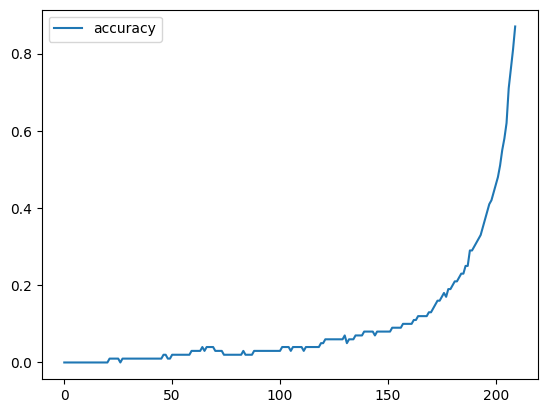

In [47]:
'''
이게 무슨 말이냐면
신규 데이터를 분석하고 싶다면 기존 레코드에 새 레코드를 추가해야지, 새 레코드만으로는 분석이 불가능하다는 뜻이다.
방법은 2가지 정도가 있을 것같다.
첫 번째는 모델을 불러오기만 해서 새 레코드를 분석하는 것이고,
두 번째는 새 레코드가 들어올 때마다 모델을 만들어서 분석하는 것이다.
아마도 두 번째가 정확도 측면에서는 더 낫지 않을까.
'''

df2.plot(y=['accuracy'])